## General learning theory

Let us say there is a quantitative response of interest $Y$, which is indirectly observed using predictor variables $X_1, X_2, ..., X_p$. Then the relationship between $Y$ and $X$ can be written as:

$$Y = f(X) + \epsilon$$

Where $f$ is an unknown function of the predictor variables, $\epsilon$, a random error term. 

The typical goal of any statistical learning task is to estimate $f$. We want to find a function $\hat f$ such that $Y \approx \hat f(x)$. Two main reasons we would want to estimate $f$: ___prediction___ and ___inference___. In the prediction sense, $\hat f$ is treated as a black box and we focus on modelling $\hat f$ to yield accurate predictions for $Y$. In the inference setting, we would like to understand the effects of $X_i$ on $Y$; here we care about the form $f$ takes. There are two broad ways of looking at how $f$ can be estimated: ___parameteric___ and ___non-parameteric___ methods. In the parameteric method, we start with an assumption of the functional form of $f$. Having assumed a form, the problem is reduced to estimating the parameters of the function, such that the parameters fit the available observations well. Non-parameteric do not assume a form for $f$. They seek an estimate of $f$ that gets close to the data points while remaining smooth. 

Depending on the choice of function we assume for $f$, we can say that different models vary in their flexibility. For example, linear regression is rather inflexible as it can only generate linear functions, whereas SVMs with non-linear kernels are highly flexible. Usually, there is a trade-off between the flexibility and interpretability of a model. A less flexible model is often more interpretable, as we would prefer in the inference setting, and more flexible methods, which might not be interpretable for purely prediction tasks. If more flexible models could fit the data better, one could expect that they would give more accurate prediction than less flexible models. However, that is not always the case.

Let us look at an example to illustrate that. There are a set of sample points of the function $f = cos(\frac{3 \pi}{2}) + \epsilon$. We are not actually aware of the exact form of the function, and are trying to estimate $f$ based on the sample points. Several regression models with different degrees of polynomials are fit to the data.

In [1]:
import numpy

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score

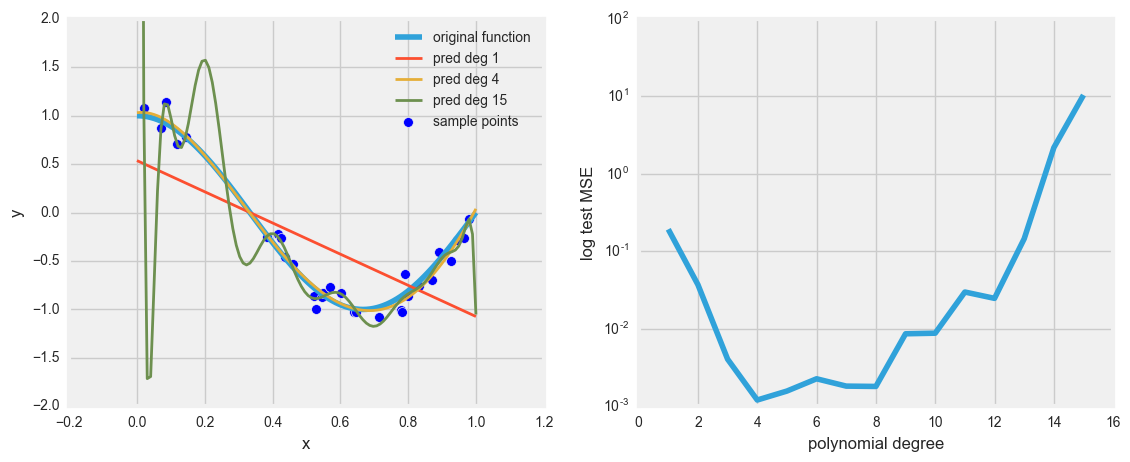

In [3]:
numpy.random.seed(0)

n_samples = 30
degrees = numpy.arange(1, 16)

f = lambda x: numpy.cos(1.5 * numpy.pi * x)

X = numpy.sort(numpy.random.rand(n_samples))
y = f(X) + numpy.random.randn(n_samples)*0.1

X_test = numpy.linspace(0, 1, 100)

models = []

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
ax = axes[0]
ax.plot(X_test, f(X_test), label='original function')
ax.scatter(X, y, label='sample points', s=50)

for i in range(len(degrees)):    
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([('polynomial_features', polynomial_features),
                         ('linear_regression', linear_regression)])
    pipeline.fit(X[:, numpy.newaxis], y)
    models.append(pipeline)
    y_pred = pipeline.predict(X_test[:, numpy.newaxis])
    if degrees[i] in [1, 4, 15]:
        ax.plot(X_test, y_pred, label='pred deg '+str(degrees[i]), linewidth=2)

ax.set_ylim(-2, 2)
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('y')

# MSE plot
X_test = numpy.linspace(0, 1, 100)
y_true = f(X_test)
MSE = []
for model in models:
    y_pred = model.predict(X_test[:, numpy.newaxis])
    MSE.append(mean_squared_error(y_true, y_pred))

ax = axes[1]
ax.plot(degrees, MSE)
ax.set_yscale('log')
ax.set_xlabel('polynomial degree')
ax.set_ylabel('log test MSE')

From the left plot, we can see that higher degree polynomials fit the data better. While the degree 1 polynomial (less flexible) hardly passes through any of the sample points, the degree 15 polynomial (highly flexible) passes through every single point. The mean square error (MSE) for regression defined by $MSE = \frac{1}{n} \sum_{i} (y_i - (\hat f(x_i))^2$, reduces as the model fits the training data before (training MSE), but what is really more important is how the estimate of $f$ performs on unseen data before: test MSE. The right plot shows the test MSE as a function of the polynomial degree, and we can see that the test MSE initially decreases as we fit more flexible methods, but starts to increase for highly flexible methods. This is called ___overfitting___ the data. This is because our model finds patterns in the training data that are caused by random chance rather than by properties of the true function.


### Bias-Variance trade-off

The test error at a point $x_0$ or the expected prediction error can be shown to be

$$E[(Y - \hat f(X))^2 \mid X = x_o] = Var(\epsilon) + Bias^2(\hat f(x_0)) + Var(\hat f(x_o)$$

$Var(\epsilon)$ is the irreducible error that is beyond our control if we knew true $f(x_0)$. $Bias$ refers to the error that is introduced by the choice of $f$ we choose for learning, compared to the true function $f$. For example, performing linear regression in a problem that is non-linear will result in some bias in the estimate of $f$, even if there are infinite training observations to fit. High bias can cause the algorithm to miss relevant features and hence cause underfitting. $Var(\hat f(x))$ refers to the amount by which $\hat f$ would change if we used a different training dataset. For a high variance method, small changes in the data will result in large changes in $\hat f$. High variance causes overfitting. Generally, highly flexible methods have low bias but high variance.

Therefore, in order to minimize the test error, one must choose a learning model that is simultaneously low squared bias and low variance. The relative rate of change between $Bias^2$ and $Var$ will determine the quality of our model. In the right plot above, increasing the degree of models initially led to reduction in bias more than increase in variance, and hence reduced test MSE. But at higher degrees, the increase in variance was much larger than the decrease in bias and hence test MSE increased.